In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier # model
from xgboost import plot_importance as xgb_plot_importance# 중요변수 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model


from sklearn.metrics import roc_curve,confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE
%matplotlib inline

from sklearn.utils.class_weight import compute_class_weight

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_onehot = pd.read_csv('onehot_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_label = pd.read_csv('label_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_dropna = pd.read_csv('onehotdropna_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_mo1 = df_onehot.drop(['age','pdays','previous'],axis=1)
df_mo2 = df_label.drop(['age','pdays','previous'],axis=1)
df_onehot.columns

Index(['age', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single',
       'marital_unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'university.degree', 'professional.course',
       'edu_unknown', 'default_no', 'default_yes', 'default_unknown',
       'house_no', 'house_yes', 'house_unknown', 'loan_no', 'loan_yes',
       'loan_unknown', 'pdays', 'previous', 'pout_no', 'pout_yes',
       'pout_unknown', 'y'],
      dtype='object')

In [3]:
def score(a,b,c):
    confusion = np.round(confusion_matrix(a,b),3)
    accuracy = np.round(accuracy_score(a,b),3)
    precision = np.round(precision_score(a,b),3)
    recall = np.round(recall_score(a,b),3)
    f1 = np.round(f1_score(a,b),3)
    
    roc_auc = np.round(roc_auc_score(a,b),3)
    
#     print(f'Confusion Matrix of {c}')
#     display(pd.DataFrame(confusion))
#     sns.heatmap(confusion, annot=True, fmt='d')
#     plt.show()
    
    return confusion,pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[c])

def classification(X,y,method = None):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    

    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    
    smote_sample = SMOTE(sampling_strategy=0.2) 
    X_sm, y_sm = smote_sample.fit_resample(X_train, y_train)
    
    if method == 'under':
        X_train, y_train = X_under, y_under
    elif method == 'over':
        X_train, y_train = X_over, y_over
    elif method == 'smote':
        X_train, y_train = X_sm, y_sm

    model = LGBMClassifier(random_state=0)
    model.fit(X_train,y_train)
    ligt_gbm = model.predict(X_test)
    ligt_gbm_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_opt = pd.DataFrame(ligt_gbm_proba).loc[:,1]>= optimal_threshold
    
    
    model = LGBMClassifier(learning_rate=0.05,max_depth=20,random_state=0)
    model.fit(X_train,y_train)
    ligt_gbm_2 = model.predict(X_test)
    ligt_gbm_2_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_2_opt = pd.DataFrame(ligt_gbm_2_proba).loc[:,1]>= optimal_threshold
    
    
    
    model= XGBClassifier(random_state=0)
    model.fit(X_train, y_train)
    xgb_1 = model.predict(X_test)
    xgb_1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(xgb_1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     xgb_1_opt = pd.DataFrame(xgb_1_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth = 5,random_state=0)
    evals = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = "logloss", eval_set = evals, verbose = 0)
    xgb_2 = model.predict(X_test)
    xgb_2_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(xgb_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     xgb_2_opt = pd.DataFrame(xgb_2_proba).loc[:,1]>= optimal_threshold
    
    
    
    model=RandomForestClassifier(random_state=0)
    model.fit(X_train,y_train)
    rf1=model.predict(X_test)
    rf1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(rf1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     rf1_opt = pd.DataFrame(rf1_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model=DecisionTreeClassifier(random_state=0)
    model.fit(X_train,y_train)
    df1=model.predict(X_test)
    df1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(df1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     df1_opt = pd.DataFrame(df1_proba).loc[:,1]>= optimal_threshold
    
    
    
    knc_model = KNeighborsClassifier()
    knc_model.fit(X_train,y_train) #학습
    knn = knc_model.predict(X_test)
    knn_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(knn_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     knn_opt = pd.DataFrame(knn_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model = Sequential()
    model.add(Dense(32,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn = model.predict(X_test)
    dnn = pd.DataFrame(data=dnn).astype('float64')
    dnn[0]=dnn[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    
    confusion1,score1 = score(y_test,ligt_gbm,'ligt_gbm_1')
    confusion2,score2  = score(y_test,ligt_gbm_2,'ligt_gbm_2')
    confusion3,score3 = score(y_test,xgb_1,'xgb_1')
    confusion4,score4  = score(y_test,xgb_2,'xgb_2')
    confusion5,score5  = score(y_test,rf1,'rf1')
    confusion6,score6  = score(y_test,df1,'df1')
    confusion7,score7  = score(y_test,knn,'knn')
    confusion8,score8  = score(y_test,dnn[0],'dnn')
    
    


        
    df = pd.concat([score1,score2,score3,score4,score5,score6,score7,score8],axis=1)
    return np.round(df,3)

# 모델의 예측 성능 비교
## 원데이터 학습(샘플링 방식에 따라 구분)

None sampling
387/387 [==============================] - 1s 1ms/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.895,0.897,0.894,0.897,0.876,0.866,0.885,0.898
precision,0.607,0.644,0.595,0.645,0.400,0.333,0.476,0.661
recall,0.196,0.193,0.178,0.196,0.214,0.193,0.191,0.194
f1,0.296,0.297,0.274,0.300,0.279,0.244,0.272,0.300
roc_auc,0.590,0.590,0.581,0.591,0.587,0.572,0.582,0.591
score,0.717,0.752,0.695,0.755,0.520,0.441,0.583,0.770


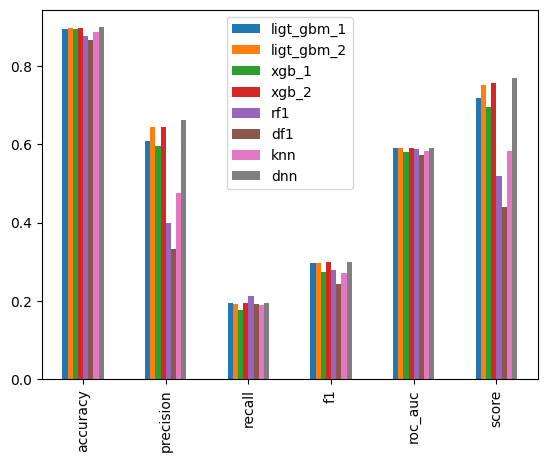

under sampling
387/387 [==============================] - 1s 1ms/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.744,0.775,0.703,0.805,0.612,0.630,0.764,0.769
precision,0.217,0.239,0.193,0.270,0.159,0.161,0.211,0.238
recall,0.491,0.459,0.516,0.432,0.573,0.544,0.402,0.477
f1,0.301,0.314,0.281,0.332,0.249,0.249,0.277,0.317
roc_auc,0.633,0.637,0.622,0.642,0.595,0.593,0.606,0.642
score,0.492,0.496,0.482,0.512,0.480,0.466,0.436,0.505


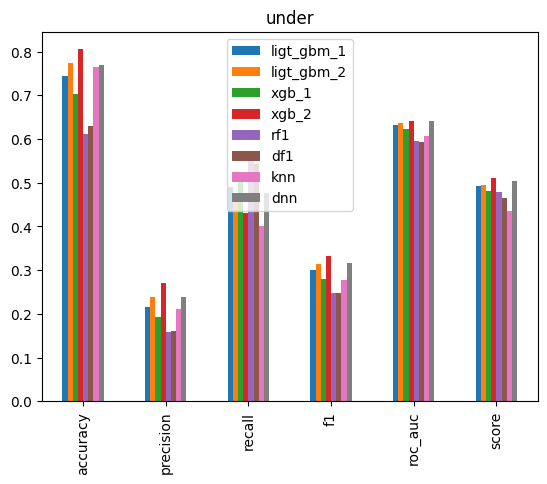

over sampling
387/387 [==============================] - 0s 972us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.780,0.788,0.753,0.759,0.736,0.730,0.832,0.758
precision,0.245,0.251,0.220,0.227,0.186,0.166,0.280,0.235
recall,0.459,0.449,0.468,0.476,0.400,0.348,0.315,0.511
f1,0.320,0.322,0.299,0.308,0.254,0.225,0.297,0.322
roc_auc,0.640,0.640,0.629,0.636,0.589,0.564,0.606,0.650
score,0.502,0.502,0.482,0.494,0.410,0.361,0.456,0.521


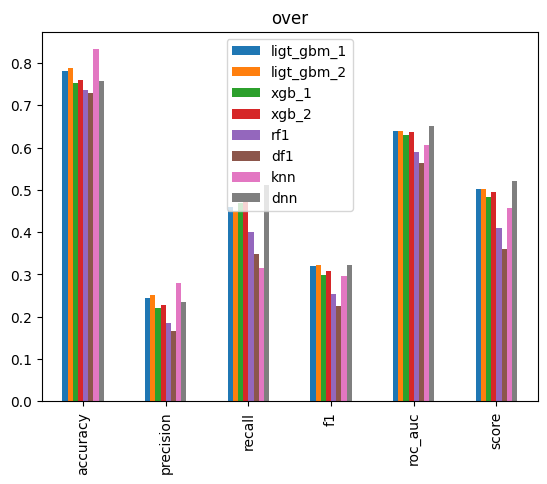

smote sampling
387/387 [==============================] - 0s 945us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.897,0.897,0.896,0.897,0.874,0.863,0.868,0.897
precision,0.626,0.634,0.617,0.637,0.389,0.325,0.372,0.618
recall,0.199,0.206,0.192,0.189,0.220,0.201,0.256,0.217
f1,0.302,0.311,0.293,0.292,0.281,0.248,0.303,0.321
roc_auc,0.592,0.595,0.589,0.588,0.588,0.574,0.600,0.600
score,0.737,0.749,0.725,0.743,0.512,0.438,0.515,0.740


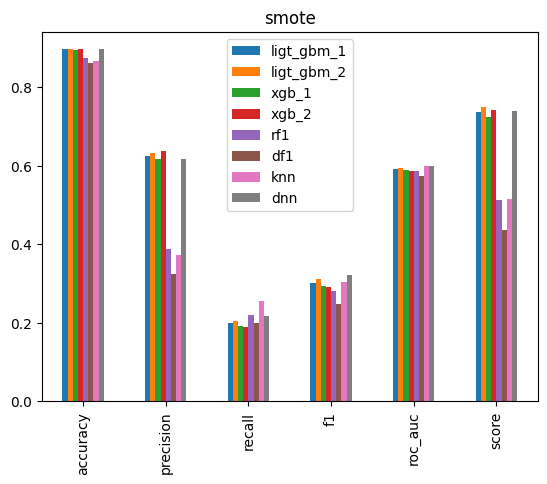

In [4]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

None sampling
286/286 [==============================] - 0s 883us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.881,0.882,0.879,0.883,0.862,0.860,0.872,0.883
precision,0.637,0.645,0.594,0.646,0.422,0.398,0.499,0.648
recall,0.176,0.182,0.176,0.188,0.196,0.177,0.182,0.198
f1,0.276,0.284,0.271,0.292,0.268,0.245,0.267,0.303
roc_auc,0.581,0.584,0.579,0.587,0.578,0.569,0.578,0.591
score,0.736,0.747,0.693,0.751,0.532,0.497,0.601,0.759


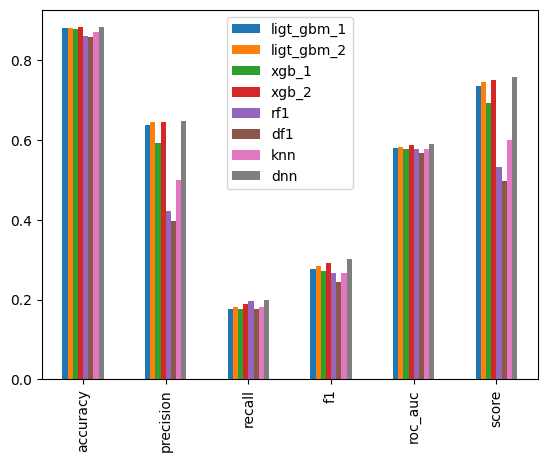

under sampling
286/286 [==============================] - 0s 874us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.747,0.769,0.718,0.798,0.612,0.637,0.773,0.689
precision,0.252,0.272,0.228,0.301,0.181,0.183,0.254,0.219
recall,0.494,0.477,0.504,0.435,0.575,0.529,0.399,0.555
f1,0.333,0.346,0.314,0.356,0.275,0.272,0.311,0.314
roc_auc,0.639,0.644,0.627,0.643,0.596,0.591,0.614,0.632
score,0.529,0.539,0.510,0.545,0.503,0.479,0.477,0.530


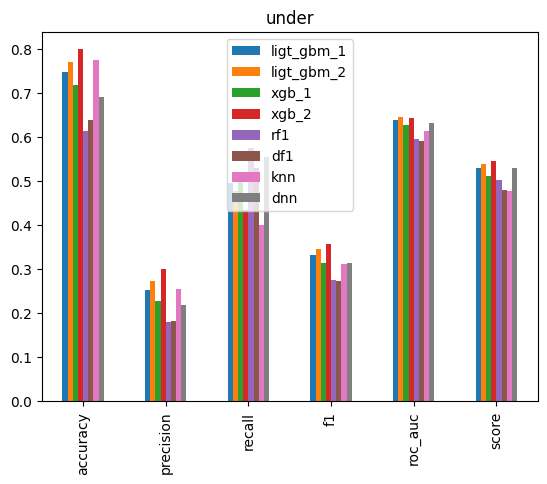

over sampling
286/286 [==============================] - 0s 948us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.791,0.802,0.752,0.792,0.701,0.699,0.837,0.771
precision,0.283,0.299,0.238,0.288,0.194,0.181,0.336,0.269
recall,0.411,0.402,0.426,0.424,0.420,0.383,0.279,0.455
f1,0.335,0.343,0.306,0.343,0.265,0.246,0.305,0.338
roc_auc,0.629,0.631,0.613,0.635,0.582,0.564,0.599,0.637
score,0.513,0.524,0.477,0.525,0.429,0.395,0.492,0.524


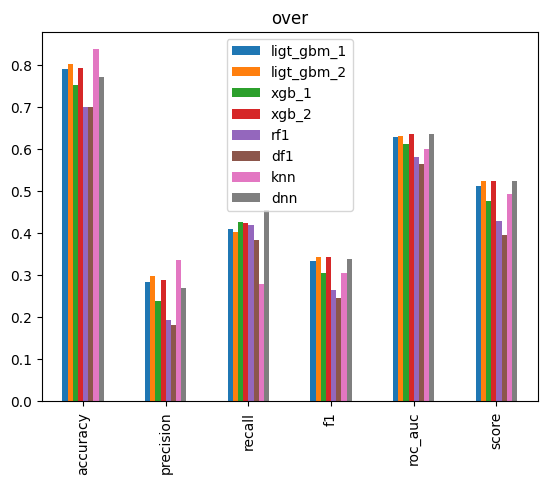

smote sampling
286/286 [==============================] - 0s 861us/step


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.881,0.882,0.878,0.883,0.860,0.858,0.864,0.883
precision,0.613,0.634,0.580,0.647,0.411,0.399,0.441,0.634
recall,0.188,0.195,0.186,0.189,0.211,0.208,0.217,0.205
f1,0.287,0.299,0.281,0.293,0.279,0.274,0.291,0.310
roc_auc,0.585,0.589,0.583,0.587,0.583,0.581,0.588,0.594
score,0.718,0.743,0.684,0.753,0.529,0.515,0.563,0.749


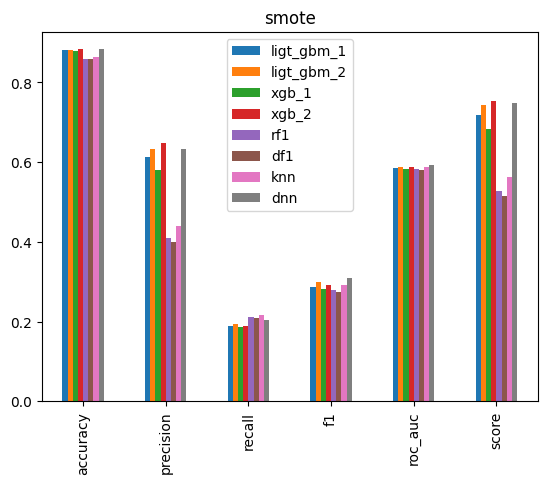

In [5]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

# 최적 모델 탐색
## 원데이터 학습(샘플링 방식에 따라 구분)

In [6]:
df_onehot_none = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'])
df_onehot_under = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'under')
df_onehot_over = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'over')
df_onehot_smote = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'smote')

387/387 [==============================] - 0s 868us/step


In [7]:
def best_score(df,i):
    for j in i:
        dt = df.loc[j,:]
        a = pd.DataFrame(dt[dt==max(dt)])
        print(f'best of {j}:',dt[dt==max(dt)])
        print('')

        
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: dnn    0.898
Name: accuracy, dtype: float64

best of precision: dnn    0.647
Name: precision, dtype: float64

best of recall: rf1    0.214
Name: recall, dtype: float64

best of f1: dnn    0.305
Name: f1, dtype: float64

best of roc_auc: dnn    0.593
Name: roc_auc, dtype: float64

best of score: dnn    0.758
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: xgb_2    0.783
Name: accuracy, dtype: float64

best of precision: xgb_2    0.246
Name: precision, dtype: float64

best of recall: rf1    0.588
Name: recall, dtype: float64

best of f1: dnn    0.323
Name: f1, dtype: float64

best of roc_auc: dnn    0.653
Name: roc_auc, dtype: float64

best of score: dnn    0.527
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.28
Name: precision, dtype: float64

best of recall: dnn    0.528
Name: recall, dtype: float64

best of f1: lig

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

In [8]:
df_dropna_none = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'])
df_dropna_under = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'under')
df_dropna_over = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'over')
df_dropna_smote = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'smote')

286/286 [==============================] - 0s 958us/step


In [9]:
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: dnn    0.898
Name: accuracy, dtype: float64

best of precision: dnn    0.647
Name: precision, dtype: float64

best of recall: rf1    0.214
Name: recall, dtype: float64

best of f1: dnn    0.305
Name: f1, dtype: float64

best of roc_auc: dnn    0.593
Name: roc_auc, dtype: float64

best of score: dnn    0.758
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: xgb_2    0.783
Name: accuracy, dtype: float64

best of precision: xgb_2    0.246
Name: precision, dtype: float64

best of recall: rf1    0.588
Name: recall, dtype: float64

best of f1: dnn    0.323
Name: f1, dtype: float64

best of roc_auc: dnn    0.653
Name: roc_auc, dtype: float64

best of score: dnn    0.527
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.28
Name: precision, dtype: float64

best of recall: dnn    0.528
Name: recall, dtype: float64

best of f1: lig

model = 

Confusion Matrix


,0,1
0,10800,168
1,1101,288


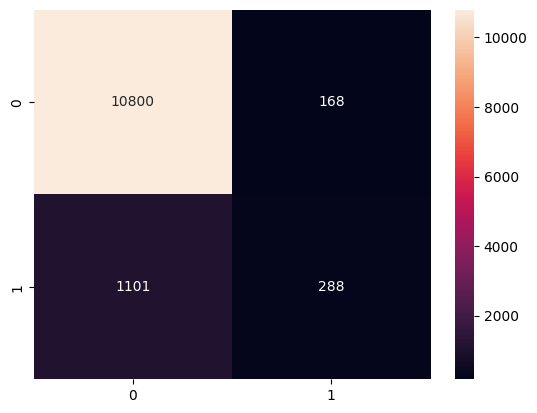

,0
accuracy,0.89700
precision,0.63200
recall,0.20700
f1,0.31200
roc_auc,0.59600
score,0.74792


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],test_size=0.3,random_state=42)
    

    
smote_sample = SMOTE(sampling_strategy=0.2) 
X_sm, y_sm = smote_sample.fit_resample(X_train, y_train)
    

X_train, y_train = X_sm, y_sm

model = LGBMClassifier(random_state=0)
model.fit(X_train,y_train)
ligt_gbm = model.predict(X_test)

    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_opt = pd.DataFrame(ligt_gbm_proba).loc[:,1]>= optimal_threshold
    
    
model = LGBMClassifier(learning_rate=0.05,max_depth=20,random_state=0)
model.fit(X_train,y_train)
ligt_gbm_2 = model.predict(X_test)

    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_2_opt = pd.DataFrame(ligt_gbm_2_proba).loc[:,1]>= optimal_threshold
    
    

a= y_test
b = ligt_gbm
    
confusion = np.round(confusion_matrix(a,b),3)
accuracy = np.round(accuracy_score(a,b),3)
precision = np.round(precision_score(a,b),3)
recall = np.round(recall_score(a,b),3)
f1 = np.round(f1_score(a,b),3)

roc_auc = np.round(roc_auc_score(a,b),3)

print('Confusion Matrix')
display(pd.DataFrame(confusion))
sns.heatmap(confusion, annot=True, fmt='d')
plt.show()

pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[0])


Confusion Matrix


,0,1
0,10818,150
1,1117,272


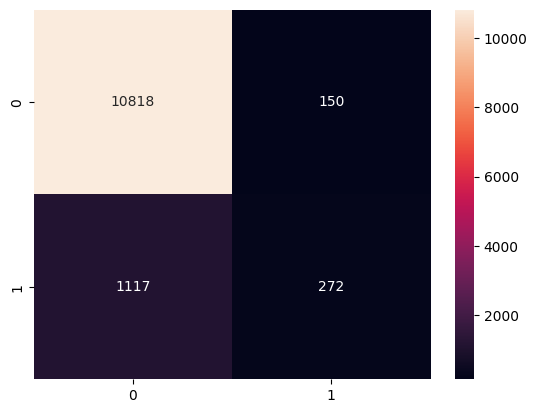

,0
accuracy,0.89700
precision,0.64500
recall,0.19600
f1,0.30000
roc_auc,0.59100
score,0.75476


In [15]:
# for i in [None]:
#     print(i,'sampling')
#     df = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],i)
#     display(df)
#     df.plot.bar()
#     plt.title(i)
#     plt.show()

X = df_onehot.loc[:,:'pout_unknown']
y = df_onehot['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth = 5,random_state=0)
evals = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = "logloss", eval_set = evals, verbose = 0)
xgb_2 = model.predict(X_test)
xgb_2_proba = model.predict_proba(X_test)


a= y_test
b = xgb_2
    
confusion = np.round(confusion_matrix(a,b),3)
accuracy = np.round(accuracy_score(a,b),3)
precision = np.round(precision_score(a,b),3)
recall = np.round(recall_score(a,b),3)
f1 = np.round(f1_score(a,b),3)

roc_auc = np.round(roc_auc_score(a,b),3)

print('Confusion Matrix')
display(pd.DataFrame(confusion))
sns.heatmap(confusion, annot=True, fmt='d')
plt.show()

pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[0])



In [21]:
xgb_2.sum()

422